# Optimisation: PSO

This example shows you how to run a global optimisation with [PSO (particle swarm optimisation)](http://pints.readthedocs.io/en/latest/optimisers/pso.html).

For a more elaborate example of an optimisation, see: [basic optimisation example](./first-example.ipynb).

Minimising error measure
Using Particle Swarm Optimisation (PSO)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Current   Time m:s
0     6      4.35e+07  4.35e+07   0:00.0
1     12     2.65e+07  2.65e+07   0:00.0
2     18     2.65e+07  2.65e+07   0:00.0
3     21     1.66e+07  1.66e+07   0:00.0
20    94     4402390   4402390    0:00.0
40    205    167172.3  167172.3   0:00.0
60    315    167172.3  167172.3   0:00.1
80    421    167172.3  167172.3   0:00.1
100   532    167172.3  167172.3   0:00.1
120   642    167172.3  167172.3   0:00.1
140   759    144193.4  144193.4   0:00.1
160   875    108336.8  108336.8   0:00.2
180   994    108336.8  108336.8   0:00.2
200   1110   108336.8  108336.8   0:00.2
220   1226   108336.8  108336.8   0:00.2
240   1340   108336.8  108336.8   0:00.2
260   1457   108336.8  108336.8   0:00.3
280   1568   108336.8  108336.8   0:00.3
300   1680   108336.8  108336.8   0:00.3
320   1796   108336.8  108336.8   0:00.3
340   1913   108336.8  1083

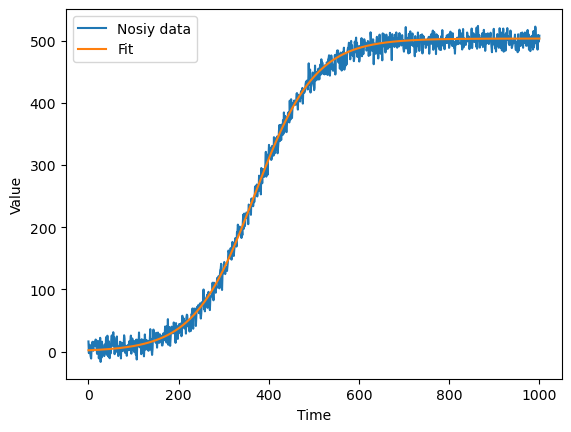

In [1]:
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 1000)
values = model.simulate(real_parameters, times)

# Add noise
values += np.random.normal(0, 10, values.shape)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Select a score function
score = pints.SumOfSquaresError(problem)

# Select some boundaries
boundaries = pints.RectangularBoundaries([0, 200], [1, 1000])

# Perform an optimization with boundaries and hints
x0 = [0, 700]
opt = pints.OptimisationController(
    score,
    x0,
    boundaries=boundaries,
    method=pints.PSO,
)
found_parameters, found_value = opt.run()

# Show score of true solution
print('Score at true solution: ')
print(score(real_parameters))

# Compare parameters with original
print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

# Show quality of fit
plt.figure()
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(times, values, label='Nosiy data')
plt.plot(times, problem.evaluate(found_parameters), label='Fit')
plt.legend()
plt.show()